In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import tensorflow.keras as keras
from nltk.corpus import stopwords
import tensorflow as tf

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras import models, optimizers
from tensorflow.keras import layers
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()


from csv import reader
import math
import pickle
import csv
import re
import math
import random

#for amazon data
import pandas as pd
import numpy as np
import string


###preprocessing part, this is common to all three datasets
def preprocess_text(text):
    #convert the text to lowercase()
    text = text.lower()
    text = remove_tags(text)
    
    #remove all urls
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags = re.MULTILINE)
    
        
    #remove users @ references and # from text
#     text = re.sub(r'\@\w+|\#', "", text)


    #remove punctuations
#     text = re.sub(r"[^a-zA-Z. ]","",text)

    #remove multiple fullstops
#     text = re.sub(r'\.+', ".",text)

    #remove all stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in stop_words]
   
    #stemming
    ps = PorterStemmer()
    stemmed_words = [ps.stem(w) for w in filtered_words]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    return " ".join(lemma_words)

[nltk_data] Downloading package punkt to /home/aseem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aseem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/aseem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [4]:
movie_reviews = pd.read_csv("IMDB Dataset.csv")

movie_reviews.isnull().values.any()

movie_reviews.shape

(50000, 2)

In [5]:
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
movie_reviews["review"][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

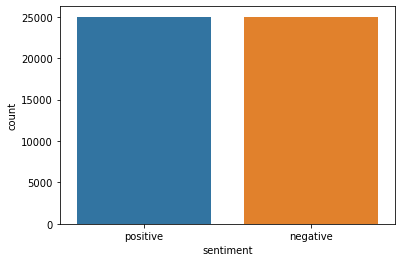

In [7]:
import seaborn as sns

sns.countplot(x='sentiment', data=movie_reviews)

In [8]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [9]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [10]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [11]:
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [12]:
y = movie_reviews['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [14]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
X_test[0]

[2951,
 2084,
 2583,
 6223,
 3461,
 11,
 20,
 4213,
 4364,
 2,
 394,
 7,
 1165,
 10219,
 3863,
 2322,
 2084,
 5,
 122,
 687,
 921,
 18,
 1861,
 31,
 672,
 309,
 51,
 4,
 22,
 3274,
 7,
 44,
 1638,
 1165,
 201,
 13375,
 237,
 22,
 14354,
 20,
 9195,
 14,
 1,
 233,
 1165,
 9211,
 52,
 19,
 7366,
 4,
 189,
 141,
 1,
 1948,
 2,
 1,
 141,
 4,
 1,
 2533,
 1165,
 10219,
 5,
 482,
 16,
 6,
 7458,
 119,
 32,
 103,
 73,
 101,
 46,
 17,
 130,
 3160,
 9,
 6,
 108,
 55,
 993,
 4,
 5875,
 6,
 200,
 2117,
 1,
 222,
 5,
 670,
 2976,
 1,
 201,
 5,
 482,
 31,
 540,
 15165,
 323,
 4283,
 35,
 5,
 161,
 55,
 2639,
 215,
 126,
 17,
 75,
 70,
 161,
 40,
 3,
 8,
 535,
 6568,
 757,
 237,
 27,
 26,
 2179]

In [16]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 256

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
dim = 300
glove_file = open('glove.840B.300d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    x = len(records) - dim
    vector_dimensions = asarray(records[x:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [18]:
embedding_matrix = zeros((vocab_size, dim))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [28]:
def CRNN():
    model = Sequential()
    model.add(layers.Embedding(vocab_size, dim, weights=[embedding_matrix], trainable=False, input_length=maxlen))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    # model.add(layers.GlobalMaxPooling1D())
    model.add(layers.MaxPooling1D(pool_size=4))
    model.add(layers.LSTM(70, dropout=0.25))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizers.Adam(learning_rate=0.00005),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    model.summary()
    return model

In [29]:
model=CRNN()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 256, 300)          27703200  
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 252, 128)          192128    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 63, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                55720     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                710       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 27,951,769
Trainable params: 248,569
Non-trainable params: 27,703,200
____________________________________

In [37]:
model = keras.models.load_model('final_models/CRNN/')

In [35]:
# history_1 = model.fit(X_train, y_train, batch_size=8, epochs=13, verbose=1, validation_data=(X_test, y_test))

In [32]:
print("Test Accuracy =", history_1.history["val_accuracy"][14:][0]*100)

Test Accuracy = 89.78999853134155


In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.2970 - accuracy: 0.8979


[0.2969684600830078, 0.8978999853134155]

In [33]:
model.save('final_models/CRNN/')

In [39]:
import matplotlib.pyplot as plt

def plot_score(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

def compare_score(history_1, history_2):

    plt.plot(history_1.history['accuracy'])
    plt.plot(history_2.history['accuracy'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['model 1','model 2'], loc='upper left')
    plt.show()

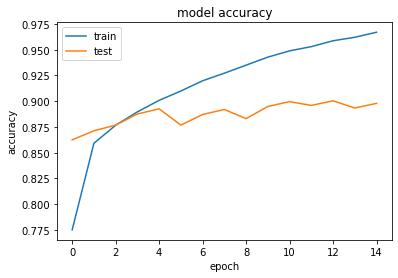

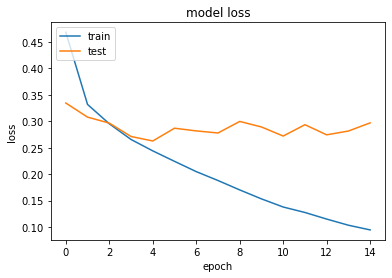

In [40]:
plot_score(history_1)

In [41]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from csv import reader
import re
import spacy
import pickle
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to /home/aseem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/aseem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aseem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
my_dict ={}
actualArray =[]
predictedArray = []
    
with open('TestDataset - Sheet1.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    next(csv_reader)
    for row in csv_reader:
        row[1] = row[1].split(',')
        actualArray.append(row[3])
        my_dict[row[0]] = []
        with open(row[4],'r') as file:
            sentence = file.read()
        sentences = sentence.split('.')
        for sentence in sentences:
            doc = nlp(sentence)
            for ent in doc.ents:
                if ent.text in row[1]:
                    sentence = preprocess_text(sentence)
                    my_dict[row[0]].append(sentence)

# print(my_dict['Tony Stark'])
final_dict = {}    

In [43]:
for character in my_dict:
    print(character)
    positiveSentences = 0
    negativeSentences = 0
    coll = tokenizer.texts_to_sequences(my_dict[character])
    coll = pad_sequences(coll, padding='post', maxlen=maxlen)
    preds = model.predict(coll)
#     print(preds)
    for pred in preds:
        if(pred>=0.5):
            positiveSentences=positiveSentences+1
        else:
            negativeSentences=negativeSentences+1
        ###write the code to assign sentiment to character here
        ##increment positiveSentences and negativeSentences accordingly
        
    total = positiveSentences + negativeSentences
    ##we have to vary this percentage and record stats
    if negativeSentences >= 0.3*total:
        final_dict[character] = "evil"
    else:
        final_dict[character] = "good"
    predictedArray.append(final_dict[character])

correct = 0
length = len(actualArray)
for i in range(length):
    if actualArray[i]==predictedArray[i]:
        correct = correct + 1
        print("went here")

        
accuracy = correct/length 
print("correct predictions are")
print(correct)
print("accuracy is ")
print(accuracy)

print(final_dict)  

Tony Stark
Gabbar
Sauron
Khilji
Bhallaladeva
Amit Shellar
Gandalf
Raju
Mogambo
Kancha
Kaal
Loki
Thanos
Peter Parker
Valentine
Venom
Otto Octavius
Scar
Simba
Lady Tremaine
Shere Khan
Mowgli
Sid Phillips
Woody
Evelyn
Bob
Dolores Umbridge
Robert Callaghan
Jafar
Gaston
Elsa
Maleficent
al Ghul
Kaecilius
Strange
Batman
Harry
Amarendra Bahubali
Bilbo Baggins
Thor
Saruman
Frodo
Farhan
Louisa
Biff Tannen
Hans Gruber
Chucky
Jack Dawson
William
Mark Watney
Rhett
Jim
Forrest
Mia
Simran
Hazel
Holmes
John Watson
Tim
Mary
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
correct predictions are
31
accuracy is 
0.5166666666666667
{'Tony Stark': 'evil', 'Gabbar': 'good', 'Sauron': 'evil', 'Khilji': 'evil', 'Bhallaladeva': 'evil', 'Amit Shellar': '

In [44]:
for character in my_dict:
    print(character)
    positiveSentences = 0
    negativeSentences = 0
    coll = tokenizer.texts_to_sequences(my_dict[character])
    coll = pad_sequences(coll, padding='post', maxlen=maxlen)
    preds = model.predict(coll)
    for pred in preds:
        if(pred>=0.5):
            positiveSentences=positiveSentences+1
        else:
            negativeSentences=negativeSentences+1
        ###write the code to assign sentiment to character here
        ##increment positiveSentences and negativeSentences accordingly
        
    total = positiveSentences + negativeSentences
    ##we have to vary this percentage and record stats
    if negativeSentences >= 0.4*total:
        final_dict[character] = "evil"
    else:
        final_dict[character] = "good"
    predictedArray.append(final_dict[character])

correct = 0
length = len(actualArray)
for i in range(length):
    if actualArray[i]==predictedArray[i]:
        correct = correct + 1
        print("went here")

        
accuracy = correct/length 
print("correct predictions are")
print(correct)
print("accuracy is ")
print(accuracy)

print(final_dict)  

Tony Stark
Gabbar
Sauron
Khilji
Bhallaladeva
Amit Shellar
Gandalf
Raju
Mogambo
Kancha
Kaal
Loki
Thanos
Peter Parker
Valentine
Venom
Otto Octavius
Scar
Simba
Lady Tremaine
Shere Khan
Mowgli
Sid Phillips
Woody
Evelyn
Bob
Dolores Umbridge
Robert Callaghan
Jafar
Gaston
Elsa
Maleficent
al Ghul
Kaecilius
Strange
Batman
Harry
Amarendra Bahubali
Bilbo Baggins
Thor
Saruman
Frodo
Farhan
Louisa
Biff Tannen
Hans Gruber
Chucky
Jack Dawson
William
Mark Watney
Rhett
Jim
Forrest
Mia
Simran
Hazel
Holmes
John Watson
Tim
Mary
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
correct predictions are
31
accuracy is 
0.5166666666666667
{'Tony Stark': 'good', 'Gabbar': 'good', 'Sauron': 'evil', 'Khilji': 'evil', 'Bhallaladeva': 'evil', 'Amit Shellar': '

In [45]:
for character in my_dict:
    print(character)
    positiveSentences = 0
    negativeSentences = 0
    coll = tokenizer.texts_to_sequences(my_dict[character])
    coll = pad_sequences(coll, padding='post', maxlen=maxlen)
    preds = model.predict(coll)
#     print(preds)
    for pred in preds:
        if(pred>=0.5):
            positiveSentences=positiveSentences+1
        else:
            negativeSentences=negativeSentences+1
        ###write the code to assign sentiment to character here
        ##increment positiveSentences and negativeSentences accordingly
        
    total = positiveSentences + negativeSentences
    ##we have to vary this percentage and record stats
    if negativeSentences >= 0.5*total:
        final_dict[character] = "evil"
    else:
        final_dict[character] = "good"
    predictedArray.append(final_dict[character])

correct = 0
length = len(actualArray)
for i in range(length):
    if actualArray[i]==predictedArray[i]:
        correct = correct + 1
        print("went here")

        
accuracy = correct/length 
print("correct predictions are")
print(correct)
print("accuracy is ")
print(accuracy)

print(final_dict)  

Tony Stark
Gabbar
Sauron
Khilji
Bhallaladeva
Amit Shellar
Gandalf
Raju
Mogambo
Kancha
Kaal
Loki
Thanos
Peter Parker
Valentine
Venom
Otto Octavius
Scar
Simba
Lady Tremaine
Shere Khan
Mowgli
Sid Phillips
Woody
Evelyn
Bob
Dolores Umbridge
Robert Callaghan
Jafar
Gaston
Elsa
Maleficent
al Ghul
Kaecilius
Strange
Batman
Harry
Amarendra Bahubali
Bilbo Baggins
Thor
Saruman
Frodo
Farhan
Louisa
Biff Tannen
Hans Gruber
Chucky
Jack Dawson
William
Mark Watney
Rhett
Jim
Forrest
Mia
Simran
Hazel
Holmes
John Watson
Tim
Mary
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
correct predictions are
31
accuracy is 
0.5166666666666667
{'Tony Stark': 'good', 'Gabbar': 'good', 'Sauron': 'good', 'Khilji': 'good', 'Bhallaladeva': 'good', 'Amit Shellar': '

In [101]:
for character in my_dict:
    print(character)
    positiveSentences = 0
    negativeSentences = 0
    coll = tokenizer.texts_to_sequences(my_dict[character])
    coll = pad_sequences(coll, padding='post', maxlen=maxlen)
    preds = model.predict(coll)
#     print(preds)
    for pred in preds:
        if(pred>=0.5):
            positiveSentences=positiveSentences+1
        else:
            negativeSentences=negativeSentences+1
        ###write the code to assign sentiment to character here
        ##increment positiveSentences and negativeSentences accordingly
        
    total = positiveSentences + negativeSentences
    ##we have to vary this percentage and record stats
    if negativeSentences >= 0.6*total:
        final_dict[character] = "evil"
    else:
        final_dict[character] = "good"
    predictedArray.append(final_dict[character])

correct = 0
length = len(actualArray)
for i in range(length):
    if actualArray[i]==predictedArray[i]:
        correct = correct + 1
        print("went here")

        
accuracy = correct/length 
print("correct predictions are")
print(correct)
print("accuracy is ")
print(accuracy)

print(final_dict)  

Tony Stark
Gabbar
Sauron
Khilji
Bhallaladeva
Amit Shellar
Gandalf
Raju
Mogambo
Kancha
Kaal
Loki
Thanos
Peter Parker
Valentine
Venom
Otto Octavius
Scar
Simba
Lady Tremaine
Shere Khan
Mowgli
Sid Phillips
Woody
Evelyn
Bob
Dolores Umbridge
Robert Callaghan
Jafar
Gaston
Elsa
Maleficent
al Ghul
Kaecilius
Strange
Batman
Harry
Amarendra Bahubali
Bilbo Baggins
Thor
Saruman
Frodo
Farhan
Louisa
Biff Tannen
Hans Gruber
Chucky
Jack Dawson
William
Mark Watney
Rhett
Jim
Forrest
Mia
Simran
Hazel
Holmes
John Watson
Tim
Mary
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
went here
correct predictions are
31
accuracy is 
0.5166666666666667
{'Tony Stark': 'good', 'Gabbar': 'good', 'Sauron': 'good', 'Khilji': 'evil', 'Bhallaladeva': 'evil', 'Amit Shellar': '